<a href="https://colab.research.google.com/github/SDS-AAU/M1-2019/blob/master/notebooks/M1_Supervised_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quick - Live Coding Supervised ML pipeline in Python

In this tutorial we are going to use an already clean dataset from the Nomadlist Cities data to predict the continent where the city is located.

We are going to encode target-labeld (world regions), scale our features and try out different algorithms including LogisticRegression, Random Forest, Catboost and XGBoost. 

The tutorial will mostly rely on the Sklearn ML library.
You will see that the syntax and logic of Sklearn is also used in other new libraries like Catboost and XGBoost

In [0]:
# Import standard Libraries
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize':(10,10)})

## Loading and selecting the data

In [0]:
# Load data
data = pd.read_csv('https://github.com/SDS-AAU/M1-2019/raw/master/data/cities_prep.csv')

In [0]:
# Select the (independant) features that we are going to use to train the model
X = data.loc[:,'cost_nomad':'weed']

In [0]:
# Define the dependant variabel / target to predict (world region)
y = data.region

## Transforming, preprocessing and splitting

In [0]:
# Load and instantiate a LabelEncoder that will turn our text labels (regions into indices)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [0]:
# Transform labels into indices by passing y to the encoder
y_enc = encoder.fit_transform(y)

In [0]:
# Load and instantiate a StandardSclaer 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [0]:
# Apply the scaler to our X-features
X_scaled = scaler.fit_transform(X)

In [0]:
# Split the data using the train_test_split module. We keep 20% of the data for testing and use 80% to train the model
# Random state defined with an arbitrary number for reproducibility

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_enc, test_size = 0.2, random_state = 42)

## Training and evaluating various models

In [0]:
# Import modules that we are going to use for all models

# Import K-fold crossvalidation
from sklearn.model_selection import cross_val_score

# Import Classification Report for later evaluatoion of performance
from sklearn.metrics import classification_report

### LogisticRegression (let's call it that for now without going into details)

In [11]:
# Import and instantiate the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# K-fold cross-validation (splitting the 80% into 5 chunks, using 4 to train and 1 to evaluate)
scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

# Model training
model.fit(X_train, y_train)

# Model performance on the test-set
print(model.score(X_test, y_test))

[0.7007874  0.68253968 0.69354839 0.66129032 0.69918699]
0.6538461538461539


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

The overall accuracy is at 69% which is not too impressive. In a multiclass setting that number is also somewhat hard to interpret and that's where it's useful to look at other evaluation statistics

In [12]:
# Performance evaluation using the classification_report

target_names = encoder.inverse_transform(list(set(y_test))) # get real region names back using inverse_transform

y_pred = model.predict(X_test) # predict from the testset

print(classification_report(y_test, y_pred, target_names=target_names)) #Print out the report

              precision    recall  f1-score   support

      Africa       0.44      0.50      0.47         8
    Americas       0.64      0.63      0.64        46
        Asia       0.73      0.69      0.71        51
      Europe       0.62      0.69      0.65        48
     Oceania       1.00      0.33      0.50         3

    accuracy                           0.65       156
   macro avg       0.69      0.57      0.59       156
weighted avg       0.66      0.65      0.65       156



Logistic regression is not doing too well. It is particularly bad when predicting African cities.

Here the recall score is perhaps more interesting than the precision score.

#### Let's inspect the performance visually

In [13]:
# For that we need to install an updated version of the MLxtend library (it will make plotting of the confusion matrix easy)
!pip install -U mlxtend

     |████████████████████████████████| 1.3MB 9.5MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [0]:
# Import the confusion matrix plotter module
from mlxtend.plotting import plot_confusion_matrix

# We will also import sklearns confusion matrix module that will make it easy to produce a confusion matrix
# It's actually just a cross-tab of predicted vs. real values
from sklearn.metrics import confusion_matrix

(<Figure size 720x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6ebb111da0>)

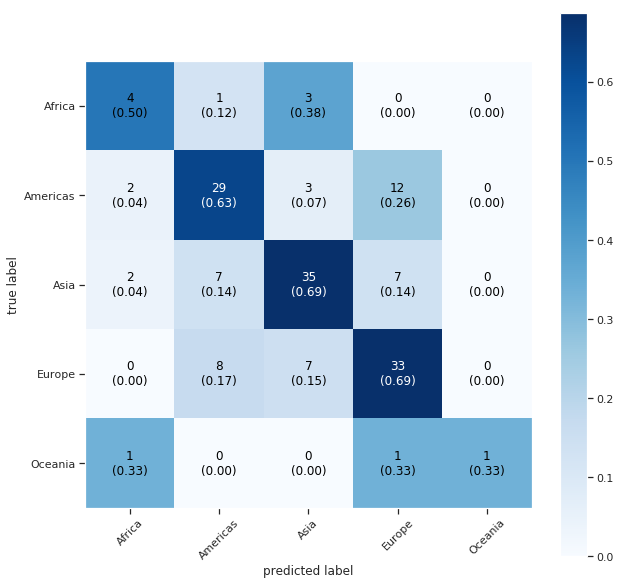

In [25]:
# calculate the confusion matrix
confmatrix = confusion_matrix(y_test,y_pred) 

# Let's plot
plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                class_names = target_names)

As you can see, the model struggeled a lot with African cities and places in Oceania. That is probably also because those are not too many in the data and thus it is hard for the model to learn abot their characteristics.

Some vities form the Americas have been placed in Europe (probably places like Boston or cities in Latinamerica that are similar to Southern Europe). It's an interesting exercise to explore misplaced observations...

### Random Forest
Now we can try out a more complex model (and hopefully more powerfull)
The process is exactly the same and thus there are not too many comments in the code

In [26]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

model.fit(X_train, y_train)
print(model.score(X_test, y_test))

[0.83464567 0.79365079 0.80645161 0.79032258 0.86178862]
0.8333333333333334


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

The test-score is well within the values produced in the crossvalidation
Overall performance goes up (as expected)

In [27]:
# Performance evaluation using the classification_report

target_names = encoder.inverse_transform(list(set(y_test))) # get real region names back using inverse_transform

y_pred = model.predict(X_test) # predict from the testset

print(classification_report(y_test, y_pred, target_names=target_names)) #Print out the report

              precision    recall  f1-score   support

      Africa       0.22      0.25      0.24         8
    Americas       0.83      0.87      0.85        46
        Asia       0.89      0.82      0.86        51
      Europe       0.88      0.94      0.91        48
     Oceania       1.00      0.33      0.50         3

    accuracy                           0.83       156
   macro avg       0.77      0.64      0.67       156
weighted avg       0.84      0.83      0.83       156



(<Figure size 720x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6eb93357f0>)

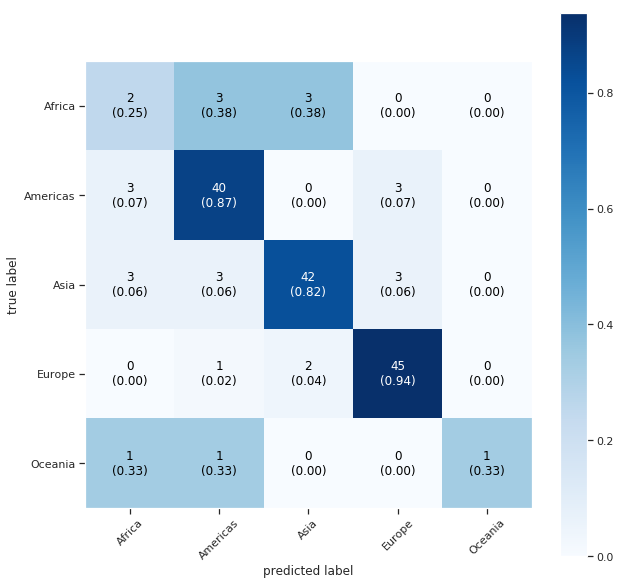

In [28]:
# calculate the confusion matrix
confmatrix = confusion_matrix(y_test,y_pred) 

# Let's plot
plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                class_names = target_names)

While the model is better at classification of the lartger groups, performance is the same for Oceania and goes down for Africa

### Catboost
Let's try out a new algorithm that promises particularly good performance on large datasets (not our case here), categorical data and has easy GPU integration
It's not part of the Colab-packages and we need to install it

In [29]:
# Install catboost
!pip install catboost

     |████████████████████████████████| 62.5MB 1.3MB/s 


In [30]:

from catboost import CatBoostClassifier

model = CatBoostClassifier(tas)

# model = CatBoostClassifier(task_type = 'GPU') # use that instead for GPU support (when GPU enabled in the system - in colab "change runtime type")

# To save time we will drop k-fold crossvalidation here by commenting out (you are welcome to enable it again)
#scores = cross_val_score(model, X_train, y_train, cv = 5)
#print(scores)


model.fit(X_train, y_train) # ~1min on CPU and ~10sec. if GPU enabled 
print(model.score(X_test, y_test))

0:	learn: 1.5786712	total: 115ms	remaining: 1m 54s
1:	learn: 1.5408447	total: 161ms	remaining: 1m 20s
2:	learn: 1.5113996	total: 208ms	remaining: 1m 9s
3:	learn: 1.4829563	total: 255ms	remaining: 1m 3s
4:	learn: 1.4501951	total: 304ms	remaining: 1m
5:	learn: 1.4254289	total: 355ms	remaining: 58.8s
6:	learn: 1.4003028	total: 401ms	remaining: 56.9s
7:	learn: 1.3766126	total: 448ms	remaining: 55.5s
8:	learn: 1.3527302	total: 494ms	remaining: 54.4s
9:	learn: 1.3282556	total: 541ms	remaining: 53.6s
10:	learn: 1.3087822	total: 590ms	remaining: 53.1s
11:	learn: 1.2887410	total: 637ms	remaining: 52.5s
12:	learn: 1.2710231	total: 683ms	remaining: 51.9s
13:	learn: 1.2462607	total: 731ms	remaining: 51.5s
14:	learn: 1.2274949	total: 779ms	remaining: 51.2s
15:	learn: 1.2122855	total: 831ms	remaining: 51.1s
16:	learn: 1.1947286	total: 878ms	remaining: 50.8s
17:	learn: 1.1789469	total: 924ms	remaining: 50.4s
18:	learn: 1.1625459	total: 971ms	remaining: 50.1s
19:	learn: 1.1504358	total: 1.02s	remainin

Overall performance goes up to 89%

In [31]:
# Performance evaluation using the classification_report

target_names = encoder.inverse_transform(list(set(y_test))) # get real region names back using inverse_transform

y_pred = model.predict(X_test) # predict from the testset

print(classification_report(y_test, y_pred, target_names=target_names)) #Print out the report

              precision    recall  f1-score   support

      Africa       0.50      0.62      0.56         8
    Americas       0.93      0.91      0.92        46
        Asia       0.96      0.86      0.91        51
      Europe       0.89      0.98      0.93        48
     Oceania       1.00      0.67      0.80         3

    accuracy                           0.90       156
   macro avg       0.86      0.81      0.82       156
weighted avg       0.91      0.90      0.90       156



(<Figure size 720x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6eae852940>)

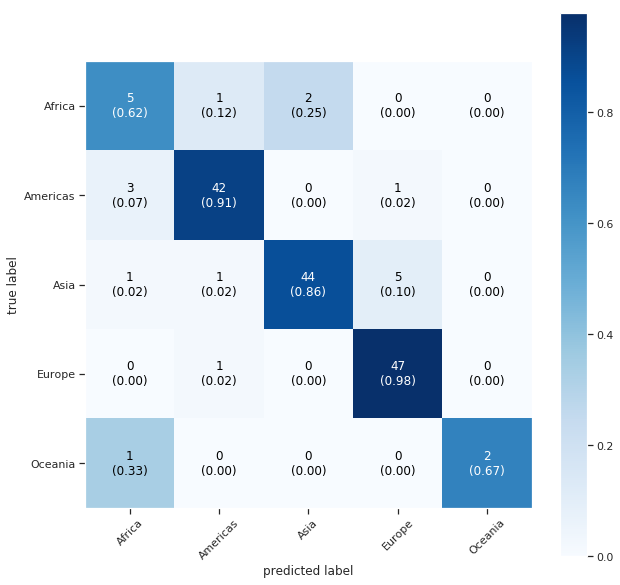

In [32]:
# calculate the confusion matrix
confmatrix = confusion_matrix(y_test,y_pred) 

# Let's plot
plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                class_names = target_names)

Catboost is (out of the box and with standard-settings) doing much better with the small classes (Africa and Oceania). 

### XGBoost
Finally, XGBoost (again we will use standard settings - i.e. no hyperameter tuning)

In [34]:
import xgboost as xgb

model = xgb.XGBClassifier()

scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

model.fit(X_train, y_train)
print(model.score(X_test, y_test))

[0.8976378  0.88095238 0.87903226 0.86290323 0.89430894]
0.9102564102564102


Overall performance is even higher as with Catboost. But let's see how the algorighm is dealing with our problematic small classes

In [35]:
# Performance evaluation using the classification_report

target_names = encoder.inverse_transform(list(set(y_test))) # get real region names back using inverse_transform

y_pred = model.predict(X_test) # predict from the testset

print(classification_report(y_test, y_pred, target_names=target_names)) #Print out the report

              precision    recall  f1-score   support

      Africa       0.50      0.50      0.50         8
    Americas       0.95      0.89      0.92        46
        Asia       0.91      0.94      0.92        51
      Europe       0.94      0.98      0.96        48
     Oceania       1.00      0.67      0.80         3

    accuracy                           0.91       156
   macro avg       0.86      0.80      0.82       156
weighted avg       0.91      0.91      0.91       156



(<Figure size 720x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6ea5a1ac50>)

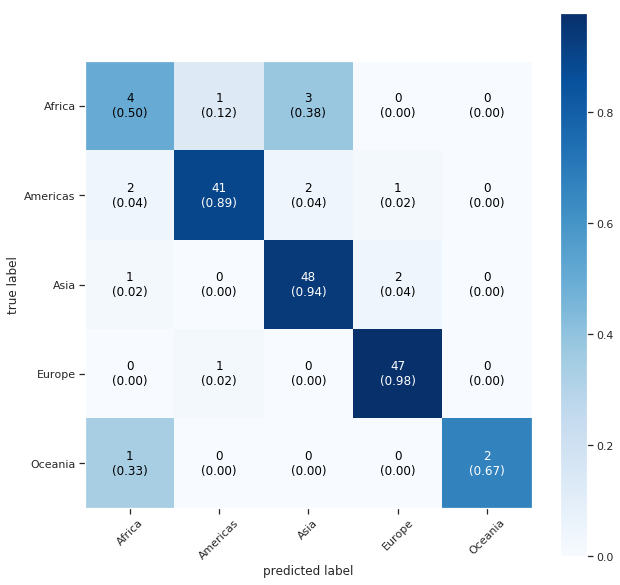

In [36]:
# calculate the confusion matrix
confmatrix = confusion_matrix(y_test,y_pred) 

# Let's plot
plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                class_names = target_names)

Overall, it seems XGBoost wins this time.

This notebook is only a quick example of the machanics of valious algorithms on small data. 
In real-world situations we would need to spend much more time tuning the models. Also: More compelx models do not always perform better...